In [1]:
%load_ext autoreload
%autoreload 2

import copy
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from visualization.plans import *
from optimize.analyze_results import *
from optimize.load import *

%matplotlib inline

C:\Users\6burg\Anaconda3\envs\gerry\lib\site-packages\pysal\explore\segregation\network\network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
C:\Users\6burg\Anaconda3\envs\gerry\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [2]:
def load_results(state):
    results = load_state(state, load_block_assignments=True)
    shapes = load_tract_shapes(state).to_crs(epsg=4326)
    shapes.GEOID = shapes.GEOID.astype(np.int64)
    shapes = shapes.set_index('GEOID')
    return results, shapes

In [3]:
TX_FIGURE = [
    ('TX_36', 14),
    ('TX_12', [71401, 71619, 71633, 71634, 71581, 71608, 71609, 71416, 71417, 71419, 71420, 71421]),
    ('TX_4', 726)
]
IL_FIGURE = [
    ('IL_18', 88),
    ('IL_9', 47),
    ('IL_4', 275),
    ('IL_2', 158)
]

In [4]:
tx_results, tx_shapes = load_results('TX')
tx_plans, tx_plan_outcomes = create_mmd_panel_input_data(tx_results, TX_FIGURE)

C:\Users\6burg\Anaconda3\envs\gerry\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\6burg\Anaconda3\envs\gerry\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


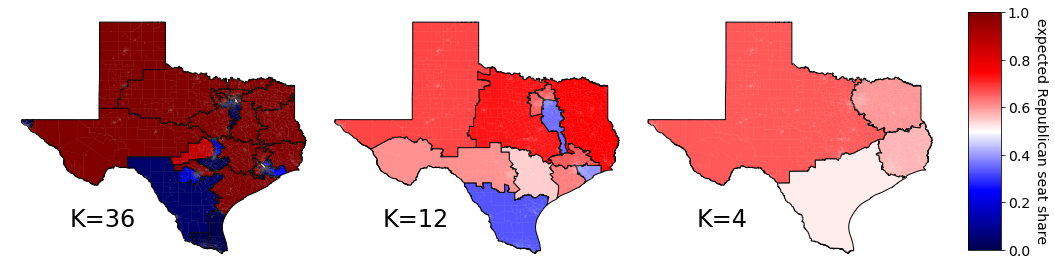

In [16]:
tx_fig = plot_mmd_panel(tx_shapes, tx_plans, tx_plan_outcomes, label_loc=(0.2, 0.15))

In [17]:
tx_fig.savefig('TX_panel.png', bbox_inches='tight')


In [7]:
il_results, il_shapes = load_results('IL')
il_plans, il_plan_outcomes = create_mmd_panel_input_data(il_results, IL_FIGURE)

C:\Users\6burg\Anaconda3\envs\gerry\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\6burg\Anaconda3\envs\gerry\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


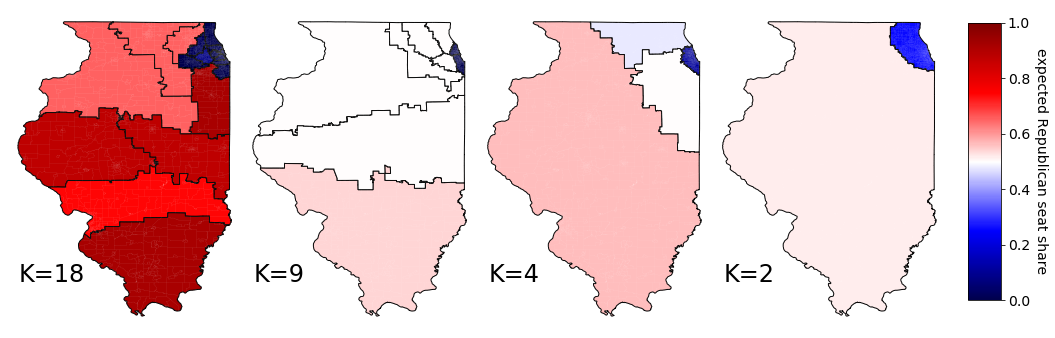

In [14]:
fig = plot_mmd_panel(il_shapes, il_plans, il_plan_outcomes, label_loc=(0.05, 0.15), figsize=(15, 7))

In [15]:
fig.savefig('IL_panel.png', bbox_inches='tight')
